# ARIMA Experimentation

100%|██████████| 1340/1340 [02:55<00:00,  7.62it/s]


Test MSE: 4.816


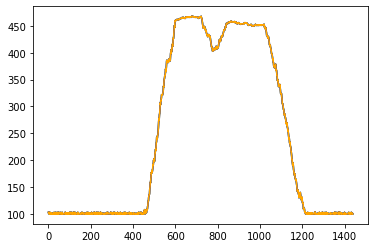

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import util
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm


%matplotlib inline

df = util.gen_random_data_frame()['Security ACEs']
# df.plot()

values = df.values
train, test = values[:100], values[100:]
history = [x for x in train]
predictions = list()

# loop over test array now
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(df.values, color='green')
plt.plot(np.insert(test, 0, train), color='blue')
plt.plot(history, color='orange')
plt.show()

In [ ]:
# fit model
#model = ARIMA(df, order=(5,1,0))
#model_fit = model.fit()
#print(model_fit.summary())

# plot residual errors
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
#residuals.plot(kind='kde')
#plt.show()
#print(residuals.describe())